#  IPL 2020 Predictions

Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008.

matches.csv - Match by match data

deliveries.csv - Ball by ball data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\Manisha\\Desktop\\Data')
match=pd.read_csv('C:/Users/Manisha/Desktop/Internship/Widhya_WPL/matches.csv')
score=pd.read_csv('C:/Users/Manisha/Desktop/Internship/Widhya_WPL/deliveries.csv')

In [3]:
match_ids = match[match.season >= 2016]['id'].unique()
matches1 = match[(match.season >= 2016) & (match['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [4]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)

In [5]:
team_1 = 'Kolkata Knight Riders'
team_2 = 'Kings XI Punjab'

# Winning Probability of Teams

Text(0.5, 1.0, 'KXIP Total Runs Score Stats Per Count')

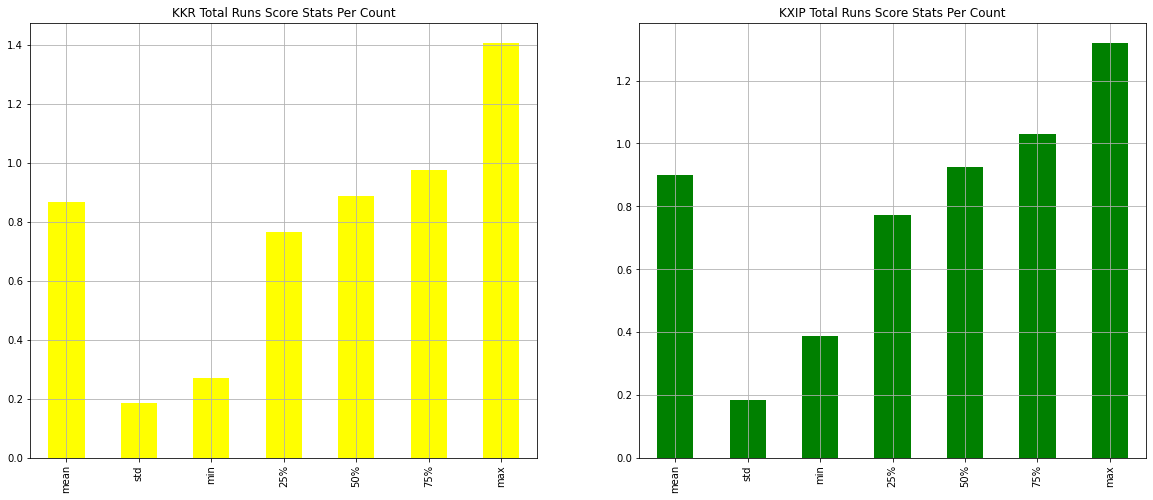

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
kkr_runs = score[score['batting_team']==team_1].groupby('match_id').sum()['total_runs']
kp_runs = score[score['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(kkr_runs.describe()[1:]/kkr_runs.describe()[0]).plot(ax=ax[0], kind='bar', color = 'yellow', grid=True)
(kp_runs.describe()[1:]/kp_runs.describe()[0]).plot(ax=ax[1], kind='bar', color='green', grid=True)
ax[0].set_title("KKR Total Runs Score Stats Per Count")
ax[1].set_title("KXIP Total Runs Score Stats Per Count")

In [7]:
today = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))])
pd.crosstab(index=today['toss_winner'], columns=today['toss_decision'])

toss_decision,field
toss_winner,
Kings XI Punjab,4
Kolkata Knight Riders,4


In [8]:
matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
10,11,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,8
47,48,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kings XI Punjab,14,0
588,589,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,6
607,608,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,Kolkata Knight Riders,7,0
653,7911,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,9
679,7937,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,Kolkata Knight Riders,31,0
701,11142,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,Kolkata Knight Riders,28,0
747,11343,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,7


The probability of winning the toss is equal. So, considering recent matches, the probability of winning of KKR is higher.

Text(0.5, 1.0, 'Percentage of Winning')

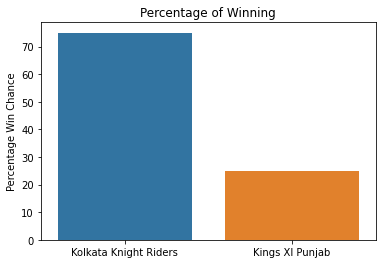

In [9]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

The following Graph also predicts the chances of winning of KKR is high. 

In [15]:
score = score[score.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    score[col] = score[col].apply(team_correction)

score.fillna(0, inplace=True)
score['player_dismissed'] = score['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

# Number of Total Dot Balls in the Entire Match

Text(0.5, 1.0, 'Dot balls in Entire Match')

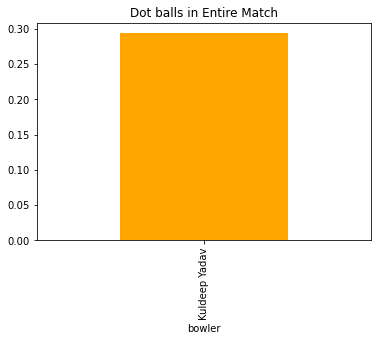

In [28]:
bowlers = ['Axar Patel', 'Praveen Kumar','Sunil Narine', 'Vinay Kumar', 'Lakshmipathy Balaji', 'Mohammad Shami', 'Kuldeep Yadav']
bowlers_dot = score[(score['bowler'].isin(bowlers)) & (score['total_runs']==0)]
bowlers_match = score[(score['bowler'].isin(bowlers)) & (score['match_id'].isin(bowlers_dot['match_id']))]
(bowlers_dot.groupby('bowler').count()['total_runs']/bowlers_match.groupby('bowler').count()['ball']).sort_values().plot(kind='bar', color='orange')
plt.title("Dot balls in Entire Match")

# Wickets took  between 90th to 120th ball

In [35]:
KKR_KXIP_Overs = score[(score['bowling_team'] == team_2) & (score['batting_team']==team_1) & (score['over']>=15)].groupby('match_id').sum()
print("Predicted wickets fall of KKR_KXIP is: {}".format(round(KKR_KXIP_Overs['player_dismissed'].mean())))

Predicted wickets fall of KKR_KXIP is: 2


In [36]:
KXIP_KKR_Overs = score[(score['bowling_team'] == team_1) & (score['batting_team']==team_2) & (score['over']>=15)].groupby('match_id').sum()
print("Predicted wickets fall of KXIP_KKR is: {}".format(round(KXIP_KKR_Overs['player_dismissed'].mean())))

Predicted wickets fall of KXIP_KKR is: 3


# Glen Maxwell's Contribution

In [40]:
GM_contribution = list()
for match_id in score[(score['batsman']=='Glen Maxwell')]['match_id'].unique():
    GM_runs = score[(score['batsman']=='Glen Maxwell') & (score['match_id']==match_id)]['batsman_runs'].sum()
    GM_team = score[(score['batsman']=='Glen Maxwell') & (score['match_id']==match_id)]['batting_team'].unique()[0]
    team_runs = dscore[(score['batting_team']==GM_team) & (score['match_id']==match_id)]['batsman_runs'].sum()
    pct_contribution = int(GM_runs*100/team_runs)
    GM_contribution.append([match_id, pct_contribution])

GM_contri = pd.DataFrame(data=GM_contribution, columns=['match_id', 'pct_contribution'])

count       0
unique      0
top       NaN
freq      NaN
Name: pct_contribution, dtype: object


Text(0.5, 1.0, "Glen Maxwell's Contribution")

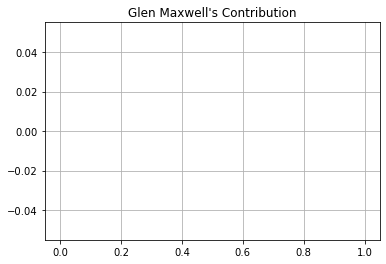

In [41]:
GM_contri['pct_contribution'].hist(color='pink', grid=True, alpha = 0.65)
print(GM_contri['pct_contribution'].describe())
plt.title("Glen Maxwell's Contribution")

# No. of no balls

In [47]:
kkr_team = ['Sandeep Warrier', 'Kuldeep Yadav', 'Dinesh Karthik', 'Pat Cummins', 'Shubham Gill']
kxip_team = ['KL Rahul', 'Mandeep singh', 'Jimmy Neesham', 'Deepak Hooda', 'Glen Maxwell']

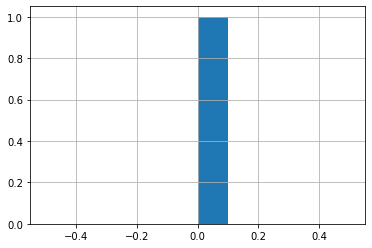

In [48]:
score[score['bowler'].isin(kkr_team+kxip_team)].groupby('bowler').mean()['noball_runs'].hist()

# Summary

- The central tendency measures of both the teams in regards of their scores per match were compared and toss winning chances were compared. Adding the recent playing stats of both the teams, the winning chances were estimated.

- The total Dot ball in the entire match was also calculated by using the bowlers stats of the teams. 

- Wickets of both innings were calculated betwwen 90th to 120th ball of the match that were approimately between 4-6 by calculating each team stats. 

- Glen Maxwell's contribution were calculated in the entire match that was most probably equal to zero, i.e. histogram shows no data.  

- Today playing bowler's no balls per match was calculated and a histogram of this data suggested that the range would be between 0 to 1.

#                                          Thank-You